<a href="https://colab.research.google.com/github/Whaleman0423/-Python-book-practice/blob/main/tfKs_ch2_%E5%BA%8F%E5%88%97%E6%A8%A1%E5%9E%8B%E8%88%87%E5%AF%86%E9%9B%86%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF20211021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 兩種堆疊神經層的方式 :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 第一種方式 :
model_a = Sequential()
model_a.add(Dense(512, activation="relu", input_dim=784))  # 用 add() 堆疊
model_a.add(Dense(10, activation="softmax"))  

# 第二種
model_b = Sequential([
              Dense(512, activation="relu", input_dim=784),
              Dense(10, activation="softmax")])


In [ ]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


###### 只有層名稱的序號不同，其他都相同。

#### 獨立使用的啟動(激活)函式層

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation   # 匯入啟動函式層類別

model = Sequential([
              Dense(512, input_dim=784),
              Activation("relu"),
              Dense(10),
              Activation("softmax")
                             ])
model.summary()  # 與上面的模型功能相同、但結構不同

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


####layers 屬性 :

In [ ]:
model.layers

In [ ]:
model.layers[2]

In [ ]:
model.layers[2].name

'dense_5'

#### inputs 和 outputs 屬性 :

In [ ]:
model.inputs

[<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_4_input')>]

In [ ]:
model.outputs

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'activation_1')>]

#### 用 get_layer() 取得模型中的神經層 :

In [ ]:
# model.get_layer("dense_11")

ValueError: ignored

In [ ]:
# 也可以寫成
model.get_layer(name = "dense_11")

##### 將神經層用 name 指定一個名稱

In [8]:
from tensorflow.keras.layers import Dense
d = Dense(8, name="superman")
d.name

'superman'

#### 用 pop() 刪除序列模型最後面的神經層
##### 相對於 add() 可在序列模型最後面加入神經層， pop() 則可刪除序列模型最後面的神經層

In [ ]:
model.layers

In [ ]:
model.pop()

In [ ]:
model.pop()

In [ ]:
model.layers

## 載入 github 讀取專案中的 util2.py 
###### 把 util2.py 拉到 colab 暫存空間 import

In [1]:
!git clone https://github.com/Whaleman0423/-Python-book-practice.git

Cloning into '-Python-book-practice'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 156 (delta 84), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (156/156), 945.99 KiB | 7.95 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [2]:
import util2 as u

In [ ]:
(x_train, x_test), (y_train, y_test) = u.mnist_data() # 用四個變數接熟回傳值
model = u.mnist_model() # 取得新建立並編譯好的模型
model.fit(x_train, y_train, epochs=5, batch_size=128)  # 用取得的資料作訓練

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2561 - acc: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - acc: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0685 - acc: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0506 - acc: 0.9845
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - acc: 0.9889


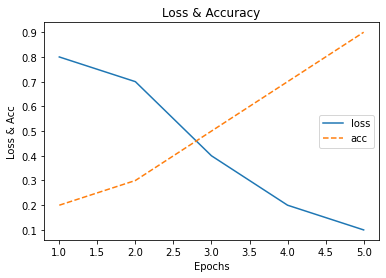

In [ ]:
import util2 as u   # 匯入自訂的工具模組
history_dict = {   # 4個 key 的數據字典
            "loss": [0.8, 0.7, 0.4, 0.2, 0.1],
            'acc': [0.2, 0.3, 0.5, 0.7, 0.9],
            'val_loss': [0.9, 0.9, 0.8, 0.6, 0.5],
            'val_acc': [0.1, 0.2, 0.6, 0.7, 0.8]
}
u.plot(
    history_dict,  
    ('loss', "acc"),  # 只繪製 key 為 loss 及 acc 的資料
    'Loss & Accuracy',  # 標題文字 
    ('Epochs', "Loss & Acc")  # x, y 軸文字
     )

# 2 - 1 存取模型的結構或權重參數

## 取得與回覆模型的結構 :
### keras 提供 3 種取得與回復模型結構的方法，可分別以
### 字典(dict)、JSON字串、或YAML字串，來取得模型結構的資訊

In [18]:
from tensorflow.keras.models import Sequential, model_from_config
import util2 as u

model = u.mnist_model()  # 取得新建立並編譯好但未訓練的模型

# 1 : 以字典取得與回復模型結構的方法 : 
config = model.get_config() # 以字典傳回模型結構
# print(config)
# model.summary()
model = Sequential.from_config(config)  # 回復模型結構

# 上一行為若為 Functional API 模型 (參見第五章)，須改用 Model 來載入結構
# from tensorflow.keras.models import Model
# model = Model.from_config(config)

In [16]:
# 2 : 以 JSON 字串取得與回復模型結構的方法 : 
from tensorflow.keras.models import model_from_json
model = u.mnist_model()
json_string = model.to_json()
print(json_string)
model = model_from_json(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_6", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_12_input"}}, {"class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer

In [19]:
# 3 : 以 YAML 字串取得與回復模型結構的方法 : 
from tensorflow.keras.models import model_from_yaml
model = u.mnist_model()
yaml_string = model.to_yaml()
model = model_from_yaml(yaml_string)  # => 方法已經被移除了!!!

RuntimeError: ignored